In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Exploring the data

In [2]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


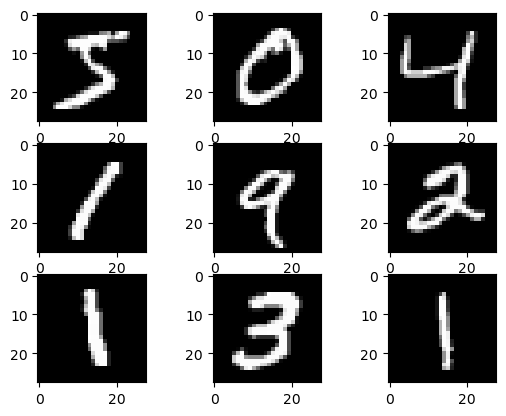

In [4]:
for i in range(9):
    plt.subplot(330 + 1 + i) # the size of the image
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))

In [5]:
pd.DataFrame(train_X.reshape([60000,28*28])).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling the data

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_X.reshape(60000,784))
X_test = scaler.transform(test_X.reshape(10000,784))
# standard scaling didnt work well because its not fit to this type of data where
# the valus is mostly 0.

## one hot encoding the labels

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
enc = OneHotEncoder()
train_y = train_y.reshape([60000,1])
test_y = test_y.reshape([10000,1])
y_train = enc.fit_transform(train_y)
y_test = enc.transform(test_y)
y_train_np =y_train.toarray()
y_test_np =y_test.toarray()

# Creating our network

In [37]:
def sigmoid_func(x):
    return 1./(1+np.exp(-x))

def d_sigmoid_func(x):
    return sigmoid_func(x)*(1-sigmoid_func(x))

def relu_func(x):
    return np.maximum(0.,x)

def d_relu_func(x):
    return np.greater(x, 0.).astype(np.float32)

In [10]:
X_train_slice = X_train[:1000,:]
y_train_slice = y_train_np[:1000,:]
a1_out = X_train_slice.reshape(1000, 784)

w1 = np.random.random_sample((784,10))
bias1 = np.random.random_sample((1,10))

w2 = np.random.random_sample((10,10))
bias2 = np.random.random_sample((1,10))

w3 = np.random.random_sample((10,10))
bias3 = np.random.random_sample((1,10))

lr = 0.0001
E=0
epoches=10
for epoch in range(epoches):
    a2_net = np.matmul(a1_out,w1)+bias1
    a2_out = sigmoid_func(a2_net)
    a3_net = np.matmul(a2_out,w2)+bias2
    a3_out = sigmoid_func(a3_net)
    a4_net = np.matmul(a3_out,w3)+bias3
    a4_out = sigmoid_func(a4_net)
        
    delta_a4 = (1/y_train_slice.shape[0])*-(y_train_slice - a4_out)*a4_out*(1-a4_out)
    E_d_w3 = np.matmul(a3_out.T,delta_a4)
    delta_a3 =np.matmul( np.matmul(delta_a4, w3), (np.matmul((1-a3_out.T), a3_out)))
    E_d_w2 = np.matmul(a2_out.T,delta_a3)
    delta_a2 =np.matmul( np.matmul(delta_a3, w2), (np.matmul((1-a2_out.T), a2_out)))
    E_d_w1 = np.matmul(a1_out.T,delta_a2)

    w1 -= lr*E_d_w1
    w2 -= lr*E_d_w2
    w3 -= lr*E_d_w3
    bias1-=lr*np.sum(delta_a2)
    bias2-=lr*np.sum(delta_a3.T)
    bias3-=lr*np.sum(delta_a4)
    if epoch==0:
        E_total = (-1/y_train_slice.shape[0])*np.sum(y_train_slice*np.log(a4_out)+(1-y_train_slice)*np.log(1-a4_out))
        print("the total error before training is: "+str(E_total))
    elif epoch>=(epoches-10):
        E_total = (-1/y_train_slice.shape[0])*np.sum(y_train_slice*np.log(a4_out)+(1-y_train_slice)*np.log(1-a4_out))
        E+=E_total
E_total = (-1/y_train_slice.shape[0])*np.sum(y_train_slice*np.log(a4_out)+(1-y_train_slice)*np.log(1-a4_out))
print("the total error is: "+str(E/10))

the total error before training is: 47.622858966516596
the total error is: 42.85770063360657


## TO DO:
  0. Write the right shapes of every instance in the `train_model()`function.
  1. Make sure the forward/back propagation in the `train_model()`function works appropriately.
  2. Make the `train_model()`function to work with batches.
  3. Make predict and evaluate functions

*  Check out others people work to get insights.

In [210]:
def train_model(epoches):
    X_train_slice = X_train[:10000,:]
    y_train_slice = y_train_np[:10000,:]
    a1_out = X_train_slice.reshape(10000, 784)

    w1 = np.random.uniform(-1,1,(784,10))
    bias1 = np.random.uniform(-1,1,(1,10))

    w2 = np.random.uniform(-1,1,(10,10))
    bias2 = np.random.uniform(-1,1,(1,10))

    w3 = np.random.uniform(-1,1,(10,10))
    bias3 = np.random.uniform(-1,1,(1,10))

    lr = 0.1
    E=0
    for epoch in range(epoches):
        a2_net = np.matmul(a1_out,w1)+bias1
        a2_out = sigmoid_func(a2_net)
        a3_net = np.matmul(a2_out,w2)+bias2
        a3_out = sigmoid_func(a3_net)
        a4_net = np.matmul(a3_out,w3)+bias3
        a4_out = sigmoid_func(a4_net)
        
        delta_a4 = (1/y_train_slice.shape[0])*-(y_train_slice - a4_out)*a4_out*(1-a4_out)
        E_d_w3 = np.matmul(a3_out.T,delta_a4)
        delta_a3 =np.matmul( np.matmul(delta_a4, w3), (np.matmul((1-a3_out.T), a3_out)))
        E_d_w2 = np.matmul(a2_out.T,delta_a3)
        delta_a2 =np.matmul( np.matmul(delta_a3, w2), (np.matmul((1-a2_out.T), a2_out)))
        E_d_w1 = np.matmul(a1_out.T,delta_a2)

        w1 -= lr*E_d_w1
        w2 -= lr*E_d_w2
        w3 -= lr*E_d_w3
        bias1-=lr*np.sum(delta_a2, axis=0).reshape(1,10)
        bias2-=lr*np.sum(delta_a3, axis=0).reshape(1,10)
        bias3-=lr*np.sum(delta_a4, axis=0).reshape(1,10)
        if epoch==0:
            E_total = (-1/y_train_slice.shape[0])*np.sum(y_train_slice*np.log(a4_out)+(1-y_train_slice)*np.log(1-a4_out))
            print("the total error before training is: "+str(E_total))
        elif epoch==epoches-1:
            E_total = (-1/y_train_slice.shape[0])*np.sum(y_train_slice*np.log(a4_out)+(1-y_train_slice)*np.log(1-a4_out))
            print("the total error is: "+str(E_total))
    
    print("a1_out.shape: "+str(a1_out.shape))
    print("a2_net.shape: "+str(a2_net.shape))
    print("a2_out.shape: "+str(a2_out.shape))
    print("a3_net.shape: "+str(a3_net.shape))
    print("a3_out.shape: "+str(a3_out.shape))
    print("a4_net.shape: "+str(a4_net.shape))
    print("a4_out.shape: "+str(a4_out.shape)+"\n")

    print("w1.shape: "+str(w1.shape))
    print("w2.shape: "+str(w2.shape))
    print("w3.shape: "+str(w3.shape)+"\n")
    
    print("bias1.shape: "+str(bias1.shape))
    print("bias2.shape: "+str(bias2.shape))
    print("bias3.shape: "+str(bias3.shape)+"\n")
    
    print("delta_a4.shape: "+str(delta_a4.shape))
    print("delta_a3.shape: "+str(delta_a3.shape))
    print("delta_a2.shape: "+str(delta_a2.shape)+"\n")
    
    print("E_d_w1.shape: "+str(E_d_w1.shape))
    print("E_d_w2.shape: "+str(E_d_w2.shape))
    print("E_d_w3.shape: "+str(E_d_w3.shape)+"\n")
    
    return w1, w2, w3, bias1, bias2, bias3
    

In [211]:
w1, w2, w3, bias1, bias2, bias3 = train_model(1000)

the total error before training is: 5.553112954830922


C:\Users\naor\AppData\Local\Temp\ipykernel_2276\2833449474.py:2: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-x))


the total error is: 3.2483120005853343
a1_out.shape: (10000, 784)
a2_net.shape: (10000, 10)
a2_out.shape: (10000, 10)
a3_net.shape: (10000, 10)
a3_out.shape: (10000, 10)
a4_net.shape: (10000, 10)
a4_out.shape: (10000, 10)

w1.shape: (784, 10)
w2.shape: (10, 10)
w3.shape: (10, 10)

bias1.shape: (1, 10)
bias2.shape: (1, 10)
bias3.shape: (1, 10)

delta_a4.shape: (10000, 10)
delta_a3.shape: (10000, 10)
delta_a2.shape: (10000, 10)

E_d_w1.shape: (784, 10)
E_d_w2.shape: (10, 10)
E_d_w3.shape: (10, 10)



In [212]:
def predict_single(w1, w2, w3, bias1, bias2, bias3, x):
    a1_out = x.reshape(x.shape[0], 784)
    a2_net = np.matmul(a1_out,w1)+bias1
    a2_out = sigmoid_func(a2_net)
    a3_net = np.matmul(a2_out,w2)+bias2
    a3_out = sigmoid_func(a3_net)
    a4_net = np.matmul(a3_out,w3)+bias3
    a4_out = sigmoid_func(a4_net)
    return a4_out

In [213]:
x = X_train[1:7,:].reshape(6, 784)
predict_single(w1, w2, w3, bias1, bias2, bias3, x)
#y_train_slice = y_train_np[7,:]
#y_train_slice

C:\Users\naor\AppData\Local\Temp\ipykernel_2276\2833449474.py:2: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-x))


array([[0.10009582, 0.11270087, 0.09910639, 0.10320321, 0.09792616,
        0.08631766, 0.10140496, 0.10700211, 0.09440575, 0.09780684],
       [0.10009582, 0.11270087, 0.09910639, 0.10320321, 0.09792616,
        0.08631766, 0.10140496, 0.10700211, 0.09440575, 0.09780684],
       [0.10009582, 0.11270087, 0.09910639, 0.10320321, 0.09792616,
        0.08631766, 0.10140496, 0.10700211, 0.09440575, 0.09780684],
       [0.10009582, 0.11270087, 0.09910639, 0.10320321, 0.09792616,
        0.08631766, 0.10140496, 0.10700211, 0.09440575, 0.09780684],
       [0.10009582, 0.11270087, 0.09910639, 0.10320321, 0.09792616,
        0.08631766, 0.10140496, 0.10700211, 0.09440575, 0.09780684],
       [0.10009582, 0.11270087, 0.09910639, 0.10320321, 0.09792616,
        0.08631766, 0.10140496, 0.10700211, 0.09440575, 0.09780684]])

In [214]:
y_train_np[7,:], y_train_np[24,:], y_train_np[240,:], 

(array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

In [215]:
w1, w2, w3, bias1, bias2, bias3

(array([[ 0.1246221 ,  0.09606383, -0.27063643, ..., -0.1741178 ,
          0.34093408, -0.14763649],
        [ 0.0652797 , -0.66275023,  0.70732009, ...,  0.65768419,
          0.10497097,  0.3455933 ],
        [ 0.83769621,  0.12394514,  0.57113848, ..., -0.55937214,
         -0.23238562, -0.91336351],
        ...,
        [-0.78944877, -0.26861409, -0.17251863, ..., -0.12657135,
         -0.6690374 , -0.34029041],
        [-0.75336892,  0.85145056,  0.48923579, ...,  0.87765878,
         -0.3138778 , -0.19759256],
        [ 0.66077112,  0.01896837,  0.69805711, ..., -0.48014789,
          0.28303895,  0.74365284]]),
 array([[ 20.40064967,  26.05118621,  26.49156239,  23.76656659,
          12.19323772,  27.08353817,  14.09910615,  10.54649673,
           4.206316  ,  27.25039253],
        [ 47.36053526,  62.85687251,  60.84544417,  56.96190227,
          30.97481769,  62.91399095,  34.34759989,  23.44739499,
          12.11400781,  64.12215338],
        [ 97.2643555 , 127.98596542, 

In [216]:
np.sum(delta_a2, axis=0).reshape(1,10)

array([[4.57661165e-05, 4.57661160e-05, 4.57661188e-05, 4.57661168e-05,
        4.57660865e-05, 4.57661192e-05, 4.57661148e-05, 4.57661127e-05,
        4.57661202e-05, 4.57660872e-05]])

# This is very important to mention:
 high values of weights means overfitting
 and high values of bias means underfitting

maybe i have those weird values on the weights and biases because i need to use a 
multivariable version of the chain rule instead (of course the cost function is different)